# <span style="color:red"> Numerical Simulation 4 </span>

## Exercise 4.1

#### <span style="color:black"> Objective </span>

It was requested to modify the MD code with the following hint:
1. Improve the MD code by enabling the possibility to (re)start reading not only a actual spatial configuration [$\vec{r}(t)$] file but also an old spatial configuration [$\vec{r}(t-dt)$] file
2. add the possibility to rescale the velocities [i.e. to correct $\vec{r}(t-dt)$] in order to match a desired temperature
In addition we had to show a picture of the equilibration phase namely a picture where is visible that quantities of interest have reached the equilibrium.

#### <span style="color:black"> Implementation </span>

The chanche of restarting with a reading of old spatial configuration was made possible by a boolean-type input variable and a corresponding input file. The old configuration is printed at every simulation but the bool variable decide if we will make use of it or not. The standard choiche is that the program will restart from both old and actual configuration if we don't want it we have to manually force the bool variable in the "bool.dat" file to false.

The scaling factor for the velocity is computed as $$\sqrt{\frac{T}{T_{eq}}}$$ where $T$ is the target temperature and $T_{eq}$ is the temperature obtained from the speed evaluated from old and actual configuration.

#### <span style="color:black"> Making of simulation </span>

The program were ran 6 times in order to achieve the equilbration starting from fcc configuration with gas condition. Each run was made with following parameters:  $M=1000$ steps, and a measure each $10$ steps, with a $\delta t$ of $0.0005$. So from time $t=0$ to $t=0.5$ we are in the fist simulation, from $t=0.5$ to $t=1$ we are in the second simulation, and so on.

#### <span style="color:black"> Result </span>

The picture below clearly highlight how after the second simulation the system is almost equilibrated and after the fourth the fluctuation are really small.

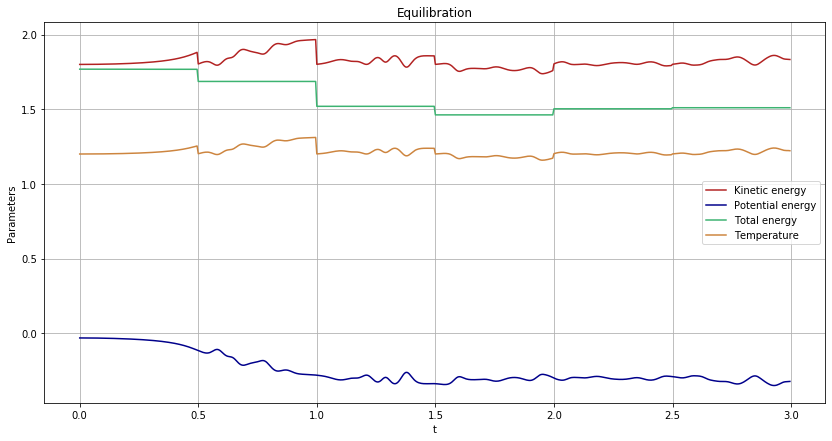

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(600)
x*=10
x=np.ndarray.astype(x, dtype=float)
x*=0.0005

Ekin=np.loadtxt("output_ekin_E.dat")
Epot=np.loadtxt("output_epot_E.dat")
Etot=np.loadtxt("output_etot_E.dat")
Temp=np.loadtxt("output_temp_E.dat")

fig=plt.figure(figsize=(14,7))
plt.plot(x, Ekin, color="firebrick", label="Kinetic energy")
plt.plot(x, Epot, color="darkblue", label="Potential energy")
plt.plot(x, Etot, color="mediumseagreen", label="Total energy")
plt.plot(x, Temp, color="peru", label="Temperature")

plt.xlabel('t')
plt.ylabel('Parameters')
plt.title("Equilibration")
plt.legend()
plt.grid(True)

## Exercise 4.2

#### <span style="color:black"> Objective </span>

Using the improved code we aim to include block average in this way we can compute not only the instantaneous values of quantities of interest but also average values.

#### <span style="color:black"> Making of simulation </span>

The implementation of block average was made with help of a function that is called at the end of each block where the accumulation variable were fullfilled. The simulation was made with solid input starting from an FCC configuration and the measure was taken after 5 equilibration simulation. The step was $M=10^{7}$ with a $N=100$ blocks

#### <span style="color:black"> Result </span>

Below it's displayed the average in function of the block number. It's interesting to observe that the fluctuation of total energy are really small compared to the other quantities. This is correct in fact we are workin in the microcanonical ensemble where total energy is fixed. 

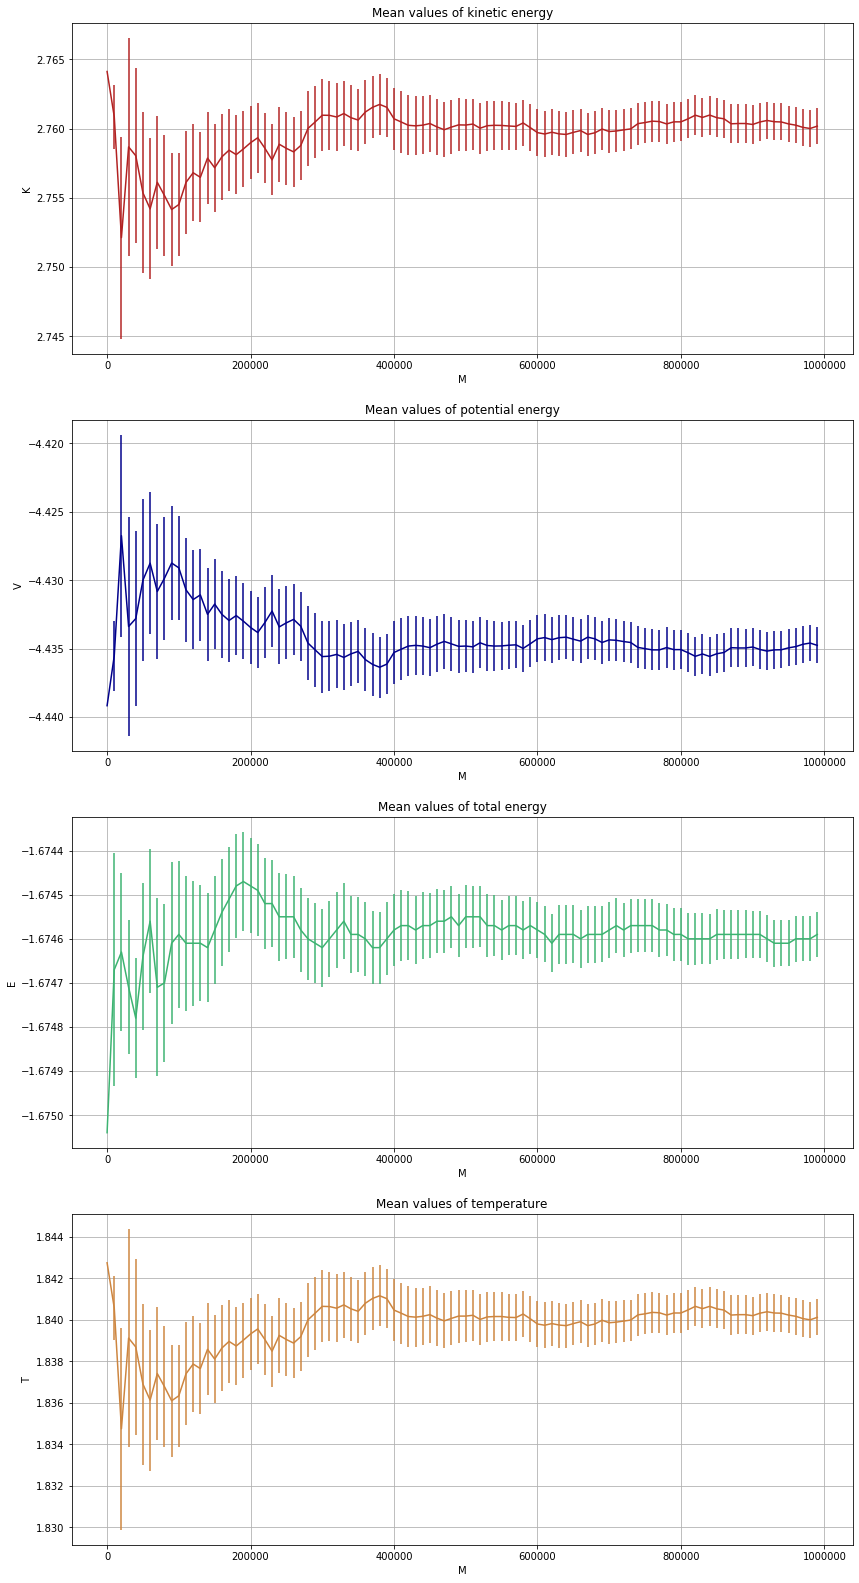

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(100)
x*=10000

Ekin, errKin =np.loadtxt("ave_Ekine.dat", unpack=True)
Epot, errPot =np.loadtxt("ave_Epote.dat", unpack=True)
Etot, errTot =np.loadtxt("ave_Etota.dat", unpack=True)
Temp, errTemp =np.loadtxt("ave_Tempe.dat", unpack=True)

fig=plt.figure(figsize=(14,28))

plt.subplot(411)
plt.errorbar(x, Ekin, yerr=errKin, color="firebrick")
plt.xlabel('M')
plt.ylabel('K')
plt.title("Mean values of kinetic energy")
plt.grid(True)

plt.subplot(412)
plt.errorbar(x, Epot, yerr=errPot, color="darkblue")
plt.xlabel('M')
plt.ylabel('V')
plt.title("Mean values of potential energy")
plt.grid(True)

plt.subplot(413)
plt.errorbar(x, Etot, yerr=errTot, color="mediumseagreen", label="Total energy")
plt.xlabel('M')
plt.ylabel('E')
plt.title("Mean values of total energy")
plt.grid(True)

plt.subplot(414)
plt.errorbar(x, Temp, yerr=errTemp, color="peru", label="Temperature")
plt.xlabel('M')
plt.ylabel('T')
plt.title("Mean values of temperature")
plt.grid(True)

## Exercise 4.3

#### <span style="color:black"> Objective </span>

Now we want to perform a series of simulation of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following condition:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

with use of previouse exercise code and express the result in SI units. 

#### <span style="color:black"> Result </span>

Below you can find the simulation parameters used for every condition and the picture of the result in $SI$ unit obtain from the following conversion:
- time: $t=t_{LJ}\space \sigma\sqrt{\frac{m}{\epsilon}}$
- temperature: $T=T_{LJ} \space \frac{\epsilon}{k_B}$
- energy: $U=U_{LJ}\space \epsilon$ 

## Solid

For the solid the equilibration took 5 simulation with $1000$ step starting from fcc and the "measure" simulation was made with $M=10^7$ steps and $N=100$ blocks. The result are reasonable, the kinetik energy is positive, potential energy is negative as the total energy. The temperature of 90 $K$ is coherent with a solid phase.

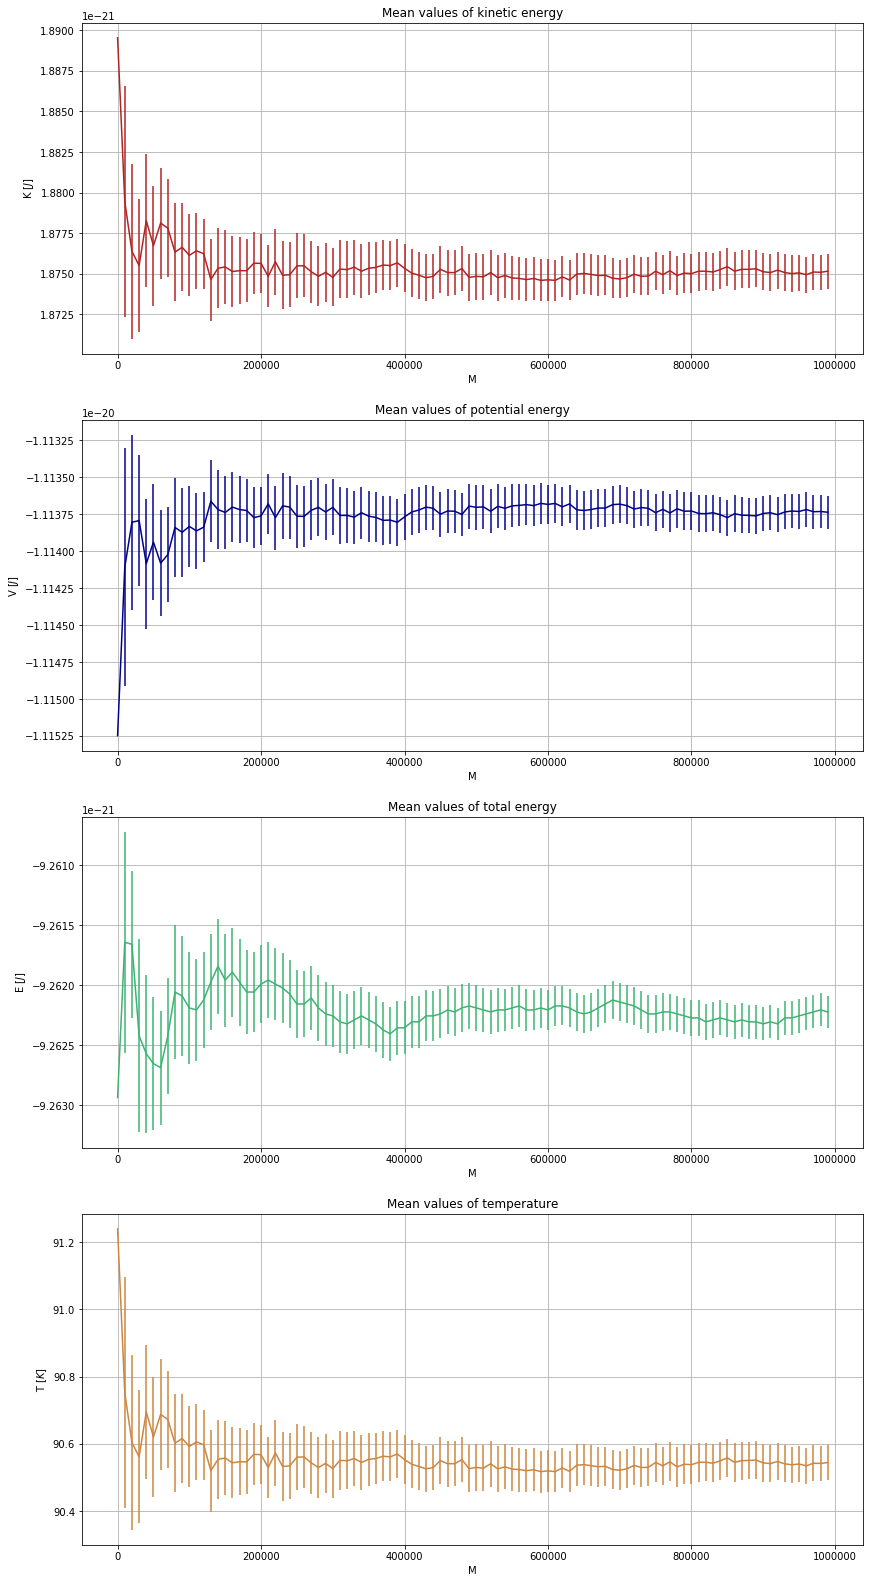

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

eps_kb=120
epsilon = eps_kb*1.380649*pow(10,-23)
x = np.arange(100)
x*=10000

Ekin, errKin =np.loadtxt("ave_EkinS.dat", unpack=True)
Epot, errPot =np.loadtxt("ave_EpotS.dat", unpack=True)
Etot, errTot =np.loadtxt("ave_EtotS.dat", unpack=True)
Temp, errTemp =np.loadtxt("ave_TempS.dat", unpack=True)

Ekin *=epsilon
Epot *=epsilon
Etot *=epsilon
Temp *=eps_kb

fig=plt.figure(figsize=(14,28))

plt.subplot(411)
plt.errorbar(x, Ekin, yerr=errKin*epsilon, color="firebrick")
plt.xlabel('M')
plt.ylabel('K $[J]$')
plt.title("Mean values of kinetic energy")
plt.grid(True)

plt.subplot(412)
plt.errorbar(x, Epot, yerr=errPot*epsilon, color="darkblue")
plt.xlabel('M')
plt.ylabel('V $[J]$')
plt.title("Mean values of potential energy")
plt.grid(True)

plt.subplot(413)
plt.errorbar(x, Etot, yerr=errTot*epsilon, color="mediumseagreen", label="Total energy")
plt.xlabel('M')
plt.ylabel('E $[J]$')
plt.title("Mean values of total energy")
plt.grid(True)

plt.subplot(414)
plt.errorbar(x, Temp, yerr=errTemp*eps_kb, color="peru", label="Temperature")
plt.xlabel('M')
plt.ylabel('T $[K]$')
plt.title("Mean values of temperature")
plt.grid(True)

## Liquid

Starting from the equilibrated solid only $3$ 1000-steps simulation was necessary in order to equilibrate. Again the "measure" simulation was made with $M=10^7$ steps and $N=100$ blocks. Also for liquid phase the results are reasonable. As it will be expected the temperature is higher than the one of solid phase.

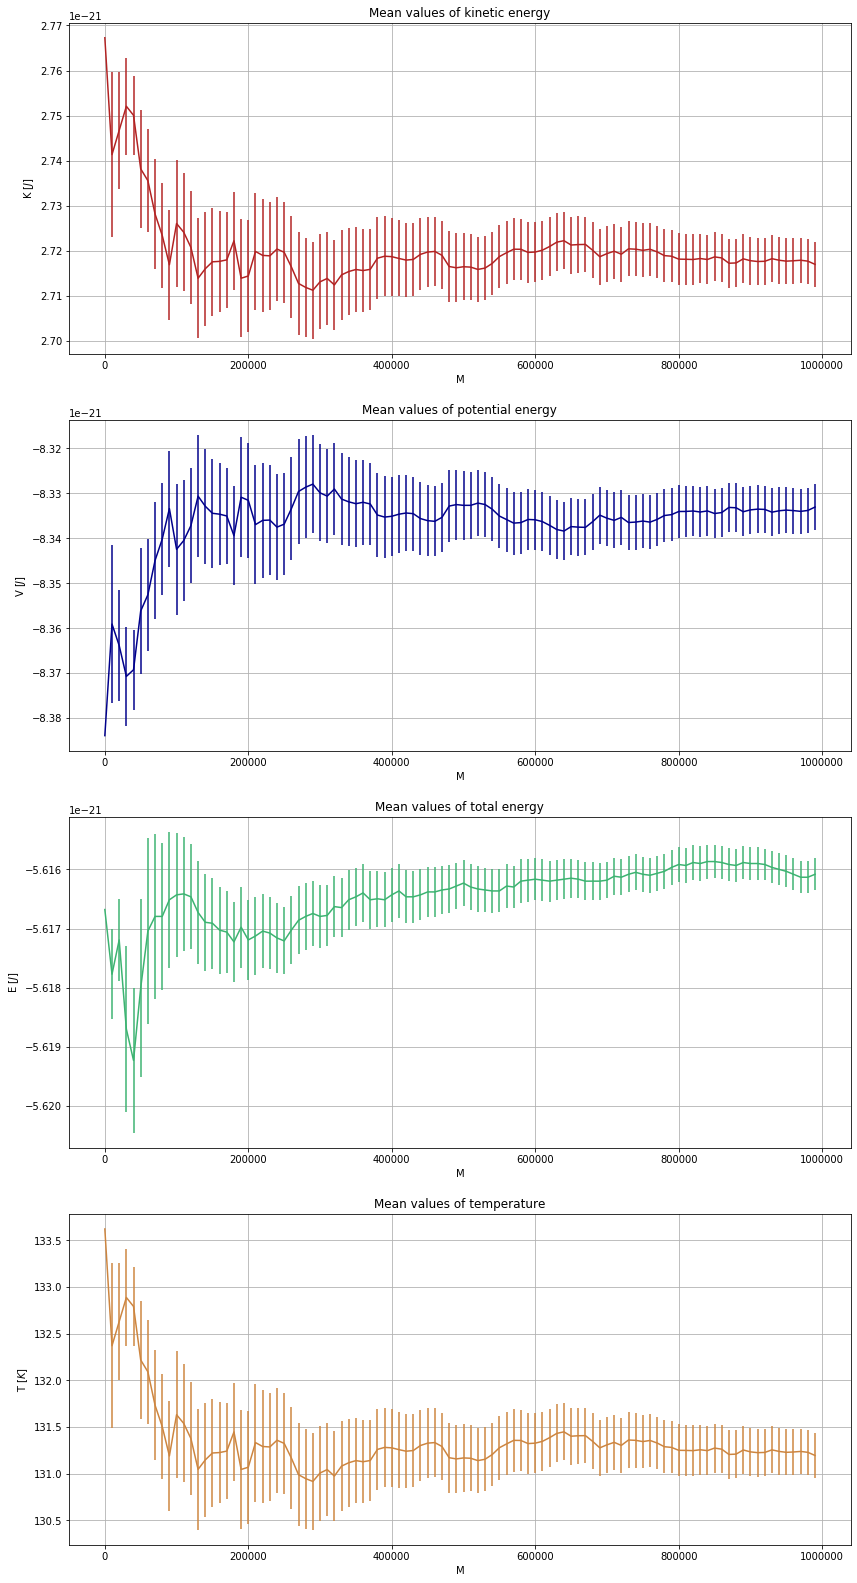

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

eps_kb=120
epsilon = eps_kb*1.380649*pow(10,-23)
x = np.arange(100)
x*=10000

Ekin, errKin =np.loadtxt("ave_EkinL.dat", unpack=True)
Epot, errPot =np.loadtxt("ave_EpotL.dat", unpack=True)
Etot, errTot =np.loadtxt("ave_EtotL.dat", unpack=True)
Temp, errTemp =np.loadtxt("ave_TempL.dat", unpack=True)

Ekin *=epsilon
Epot *=epsilon
Etot *=epsilon
Temp *=eps_kb

fig=plt.figure(figsize=(14,28))

plt.subplot(411)
plt.errorbar(x, Ekin, yerr=errKin*epsilon, color="firebrick")
plt.xlabel('M')
plt.ylabel('K $[J]$')
plt.title("Mean values of kinetic energy")
plt.grid(True)

plt.subplot(412)
plt.errorbar(x, Epot, yerr=errPot*epsilon, color="darkblue")
plt.xlabel('M')
plt.ylabel('V $[J]$')
plt.title("Mean values of potential energy")
plt.grid(True)

plt.subplot(413)
plt.errorbar(x, Etot, yerr=errTot*epsilon, color="mediumseagreen", label="Total energy")
plt.xlabel('M')
plt.ylabel('E $[J]$')
plt.title("Mean values of total energy")
plt.grid(True)

plt.subplot(414)
plt.errorbar(x, Temp, yerr=errTemp*eps_kb, color="peru", label="Temperature")
plt.xlabel('M')
plt.ylabel('T $[K]$')
plt.title("Mean values of temperature")
plt.grid(True)

## Gas

Starting from the equilibrated liquid was necessary $4$ 1000-steps simulation in order to equilibrate the system. Again the "measure" simulation was made with $M=10^7$ steps and $N=100$ blocks. During this simulation I've encountered the following difficulty: because the very small value of total energy and the automatic limit of four  digit of c++ filestream, during the printing of result there were huge fluctuations between nearest value. I resolved this problem forcing the precision of filestream to 10 digit. 
For the results remain valid the previous observation. 

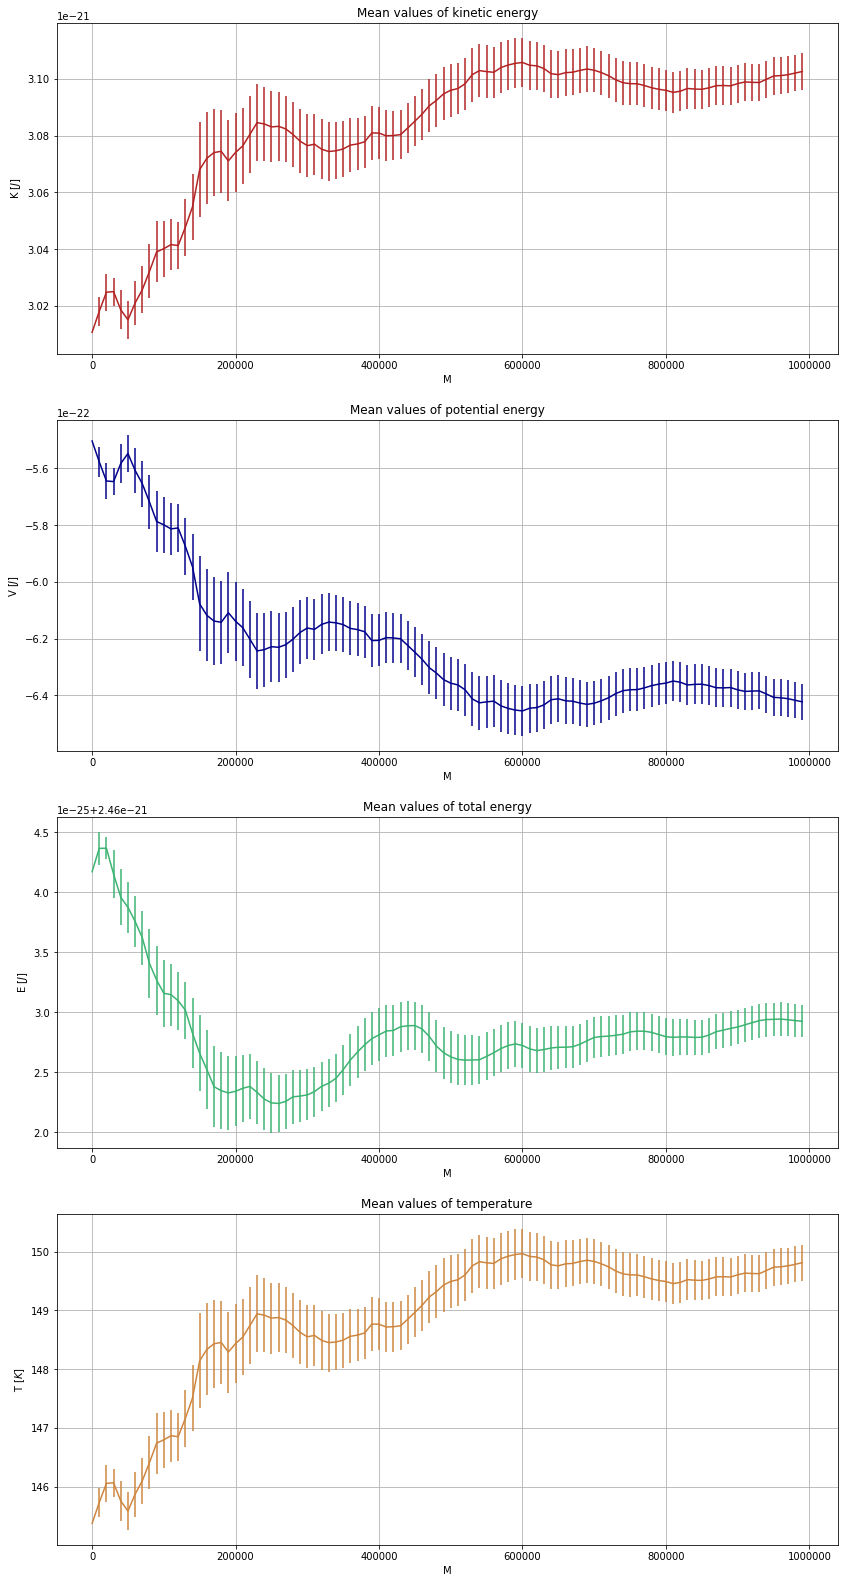

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

eps_kb=120
epsilon = eps_kb*1.380649*pow(10,-23)
x = np.arange(100)
x*=10000

Ekin, errKin =np.loadtxt("ave_EkinG.dat", unpack=True)
Epot, errPot =np.loadtxt("ave_EpotG.dat", unpack=True)
Etot, errTot =np.loadtxt("ave_EtotG.dat", unpack=True)
Temp, errTemp =np.loadtxt("ave_TempG.dat", unpack=True)


Ekin *=epsilon
Epot *=epsilon
Etot *=epsilon
Temp *=eps_kb

fig=plt.figure(figsize=(14,28))

plt.subplot(411)
plt.errorbar(x, Ekin, yerr=errKin*epsilon, color="firebrick")
plt.xlabel('M')
plt.ylabel('K $[J]$')
plt.title("Mean values of kinetic energy")
plt.grid(True)

plt.subplot(412)
plt.errorbar(x, Epot, yerr=errPot*epsilon, color="darkblue")
plt.xlabel('M')
plt.ylabel('V $[J]$')
plt.title("Mean values of potential energy")
plt.grid(True)

plt.subplot(413)
plt.errorbar(x, Etot, yerr=errTot*epsilon, color="mediumseagreen", label="Total energy")
plt.xlabel('M')
plt.ylabel('E $[J]$')
plt.title("Mean values of total energy")
plt.grid(True)

plt.subplot(414)
plt.errorbar(x, Temp, yerr=errTemp*eps_kb, color="peru", label="Temperature")
plt.xlabel('M')
plt.ylabel('T $[K]$')
plt.title("Mean values of temperature")
plt.grid(True)